In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [162]:


# Mac OS 한글 안깨지는 코드

from matplotlib import rc
rc('font', family ='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [109]:
d = pd.read_csv('total_df.csv', index_col = 0)

In [110]:
d.columns

Index(['01_CNY_KRW_내역종가', '01_EUR_KRW_내역종가', '01_USD_KRW_내역종가',
       '02_Dow_Jones_30_선물_과거_데이터종가', '02_Euro_Stoxx_선물_과거_데이터종가',
       '02_네덜란드_AEX_선물_과거_데이터종가', '02_노르웨이_OBX_선물_과거_데이터종가',
       '02_독일_DAX_선물_과거_데이터종가', '02_인도_니프티_선물_과거_데이터종가',
       '02_일본_닛케이_선물_과거_데이터종가', '02_코스피200_선물_(F)_선물_과거_데이터종가',
       '02_프랑스_CAC_선물_과거_데이터종가', '02_호주_S&P_ASX_선물_과거_데이터종가',
       '03_WTI유_선물_내역종가', '03_두바이유_내역종가', '03_브렌트유_선물_내역종가', '03_천연가스_선물_내역종가',
       '04_구리_선물_내역종가', '04_금_선물_내역종가', '04_런던_설탕_선물_내역종가', '04_런던_소맥_선물_내역종가',
       '04_런던_커피_선물_내역종가', '04_미국_옥수수_선물_내역종가', '04_육우_선물_내역종가',
       '04_은_선물_내역종가', '05_Bitcoin_비트코인_과거_데이터종가', '05_다우존스_내역종가',
       '05_유로_스톡스_50_내역종가', 'y_탄소배출권_선물_내역종가'],
      dtype='object')

In [111]:
d.sort_index(inplace=True)

In [112]:
d_change =d.pct_change().dropna()

# 10일 윈도우 모든 피쳐 투입 기본 LSTM모델

In [163]:
window_size = 10
x = []
y = []

for i in range(len(d_change) - window_size):
    x.append([d_change.iloc[i+j,:] for j in range(window_size)])
    y.append(d_change.iloc[window_size +i, -1])             

print(x[0])

[01_CNY_KRW_내역종가                 0.002361
01_EUR_KRW_내역종가                -0.007329
01_USD_KRW_내역종가                 0.000386
02_Dow_Jones_30_선물_과거_데이터종가    -0.000234
02_Euro_Stoxx_선물_과거_데이터종가       0.003174
02_네덜란드_AEX_선물_과거_데이터종가         0.007530
02_노르웨이_OBX_선물_과거_데이터종가        -0.019496
02_독일_DAX_선물_과거_데이터종가           0.002095
02_인도_니프티_선물_과거_데이터종가          -0.000903
02_일본_닛케이_선물_과거_데이터종가          -0.001088
02_코스피200_선물_(F)_선물_과거_데이터종가    0.005957
02_프랑스_CAC_선물_과거_데이터종가          0.003317
02_호주_S&P_ASX_선물_과거_데이터종가      -0.020582
03_WTI유_선물_내역종가                -0.021491
03_두바이유_내역종가                   -0.038941
03_브렌트유_선물_내역종가                -0.021494
03_천연가스_선물_내역종가                -0.003856
04_구리_선물_내역종가                   0.008000
04_금_선물_내역종가                    0.002554
04_런던_설탕_선물_내역종가               -0.015506
04_런던_소맥_선물_내역종가               -0.008937
04_런던_커피_선물_내역종가               -0.010804
04_미국_옥수수_선물_내역종가               0.004267
04_육우_선물_내역종가                   0.000955
04_은_선물_내역종가   

In [164]:
X = np.asarray(x)
Y = np.asarray(y)
print(X)
print(Y)

train_test_split = 1000

X_train = X[:train_test_split,:]
Y_train = Y[:train_test_split]

X_test = X[train_test_split:,:]
Y_test = Y[train_test_split:]

[[[ 2.36082135e-03 -7.32938813e-03  3.86440963e-04 ...  5.66798881e-04
    4.18673138e-03 -6.21890547e-03]
  [ 2.90299611e-03  1.12510548e-02  8.15411359e-03 ... -1.46952035e-02
   -1.21742852e-02 -3.12891114e-02]
  [-8.19224468e-03  1.16049077e-02 -2.69050078e-03 ... -2.32105857e-02
   -1.74050431e-02 -2.58397933e-02]
  ...
  [-4.34640878e-03 -3.12219876e-03 -2.06570598e-03 ...  1.40941255e-02
   -1.59517348e-02 -2.20994475e-02]
  [ 6.71177562e-03  1.06151935e-02  5.85390895e-03 ... -2.38701268e-02
   -2.36507937e-02 -5.79096045e-02]
  [-5.09512711e-03 -6.79384708e-03 -6.02563364e-03 ...  1.74755193e-03
    9.48693979e-03  2.09895052e-02]]

 [[ 2.90299611e-03  1.12510548e-02  8.15411359e-03 ... -1.46952035e-02
   -1.21742852e-02 -3.12891114e-02]
  [-8.19224468e-03  1.16049077e-02 -2.69050078e-03 ... -2.32105857e-02
   -1.74050431e-02 -2.58397933e-02]
  [ 8.37004405e-03  8.51600092e-03  8.89508807e-03 ... -1.01519308e-02
   -1.66013979e-02 -1.72413793e-02]
  ...
  [ 6.71177562e-03  1.0

In [165]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(1000, 10, 29) (1000,) (325, 10, 29) (325,)


In [166]:
X_train = np.reshape(X_train, (X_train.shape[0], window_size, 29))
X_test = np.reshape(X_test, (X_test.shape[0], window_size, 29))

In [167]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.callbacks import *
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential

In [170]:
model = Sequential()
model.add(LSTM(128, input_shape = (10, 29,)))
model.add(Dense(100, activation='linear'))
model.add(Dense(100, activation='LeakyReLU'))
model.add(Dense(1))
model.summary()

Model: "sequential_270"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_521 (LSTM)              (None, 128)               80896     
_________________________________________________________________
dense_762 (Dense)            (None, 100)               12900     
_________________________________________________________________
dense_763 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_764 (Dense)            (None, 1)                 101       
Total params: 103,997
Trainable params: 103,997
Non-trainable params: 0
_________________________________________________________________


In [171]:
model.compile(loss='mse', optimizer ='adam', metrics = ['accuracy'])
history = model.fit(X_train, Y_train, epochs=50, batch_size=32, validation_data =(X_test, Y_test))

Epoch 1/50
32/32 [==============================] - 2s 22ms/step - loss: 0.0011 - accuracy: 0.0140 - val_loss: 7.2466e-04 - val_accuracy: 0.0031
Epoch 2/50
32/32 [==============================] - 0s 13ms/step - loss: 0.0011 - accuracy: 0.0140 - val_loss: 7.1065e-04 - val_accuracy: 0.0031
Epoch 3/50
32/32 [==============================] - 0s 13ms/step - loss: 0.0010 - accuracy: 0.0140 - val_loss: 7.3197e-04 - val_accuracy: 0.0031
Epoch 4/50
32/32 [==============================] - 0s 13ms/step - loss: 0.0010 - accuracy: 0.0140 - val_loss: 7.0835e-04 - val_accuracy: 0.0031
Epoch 5/50
32/32 [==============================] - 0s 14ms/step - loss: 0.0010 - accuracy: 0.0140 - val_loss: 7.3163e-04 - val_accuracy: 0.0031
Epoch 6/50
32/32 [==============================] - 0s 13ms/step - loss: 0.0011 - accuracy: 0.0140 - val_loss: 7.0566e-04 - val_accuracy: 0.0031
Epoch 7/50
32/32 [==============================] - 0s 13ms/step - loss: 0.0010 - accuracy: 0.0140 - val_loss: 7.0501e-04 - val_ac

Text(0.5, 1.0, '10일')

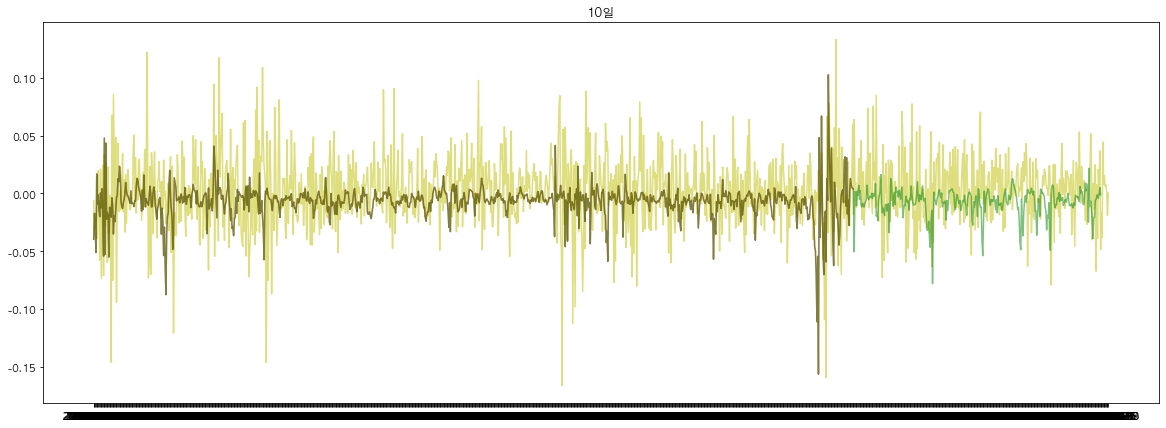

In [172]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
predicts = np.concatenate((train_predict,test_predict), axis=0)
plt.figure(figsize=(20,7))
plt.plot(d_change['y_탄소배출권_선물_내역종가'], color ='y', alpha =0.5)
plt.plot(train_predict, color ='red', alpha =0.5)
#plt.plot(test_predict, color ='red', alpha =0.5)
plt.plot(predicts, color ='green', alpha =0.5)
#plt.grid()
plt.title('10일')

## 윈도우 변경 10->20

In [173]:
window_size = 20
x = []
y = []

for i in range(len(d_change) - window_size):
    x.append([d_change.iloc[i+j,:] for j in range(window_size)])
    y.append(d_change.iloc[window_size +i, -1])             

X = np.asarray(x)
Y = np.asarray(y)

train_test_split = 1000

X_train = X[:train_test_split,:]
Y_train = Y[:train_test_split]

X_test = X[train_test_split:,:]
Y_test = Y[train_test_split:]

X_train = np.reshape(X_train, (X_train.shape[0], window_size, 29))
X_test = np.reshape(X_test, (X_test.shape[0], window_size, 29))

In [174]:
model = Sequential()
model.add(LSTM(128, input_shape = (20, 29,)))
model.add(Dense(100, activation='linear'))
model.add(Dense(100, activation='LeakyReLU'))
model.add(Dense(1))
model.summary()

Model: "sequential_271"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_522 (LSTM)              (None, 128)               80896     
_________________________________________________________________
dense_765 (Dense)            (None, 100)               12900     
_________________________________________________________________
dense_766 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_767 (Dense)            (None, 1)                 101       
Total params: 103,997
Trainable params: 103,997
Non-trainable params: 0
_________________________________________________________________


In [175]:
model.compile(loss='mse', optimizer ='adam', metrics = ['accuracy'])
history = model.fit(X_train, Y_train, epochs=50, batch_size=32, validation_data =(X_test, Y_test))

Epoch 1/50
32/32 [==============================] - 4s 45ms/step - loss: 0.0011 - accuracy: 0.0140 - val_loss: 7.7272e-04 - val_accuracy: 0.0032
Epoch 2/50
32/32 [==============================] - 1s 23ms/step - loss: 0.0010 - accuracy: 0.0140 - val_loss: 6.9986e-04 - val_accuracy: 0.0032
Epoch 3/50
32/32 [==============================] - 1s 26ms/step - loss: 0.0010 - accuracy: 0.0140 - val_loss: 7.2366e-04 - val_accuracy: 0.0032
Epoch 4/50
32/32 [==============================] - 1s 25ms/step - loss: 0.0010 - accuracy: 0.0140 - val_loss: 8.4076e-04 - val_accuracy: 0.0032
Epoch 5/50
32/32 [==============================] - 1s 24ms/step - loss: 0.0010 - accuracy: 0.0140 - val_loss: 7.9936e-04 - val_accuracy: 0.0032
Epoch 6/50
32/32 [==============================] - 1s 27ms/step - loss: 0.0010 - accuracy: 0.0140 - val_loss: 7.0141e-04 - val_accuracy: 0.0032
Epoch 7/50
32/32 [==============================] - 1s 25ms/step - loss: 0.0010 - accuracy: 0.0140 - val_loss: 7.8063e-04 - val_ac

Text(0.5, 1.0, '20일')

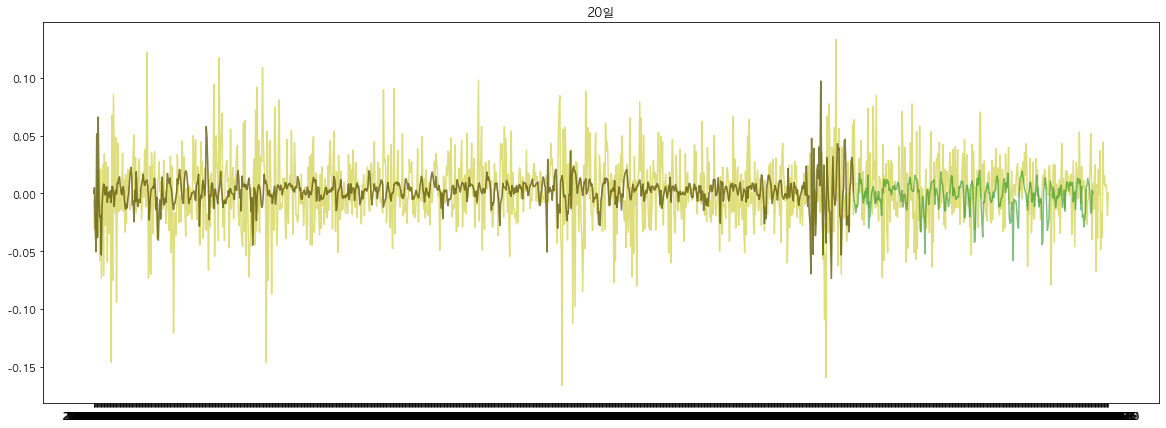

In [176]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
predicts = np.concatenate((train_predict,test_predict), axis=0)
plt.figure(figsize=(20,7))
plt.plot(d_change['y_탄소배출권_선물_내역종가'], color ='y', alpha =0.5)
plt.plot(train_predict, color ='red', alpha =0.5)
#plt.plot(test_predict, color ='red', alpha =0.5)
plt.plot(predicts, color ='green', alpha =0.5)
plt.title('20일')
#plt.grid()

# 윈도우 변경 =>3

In [177]:
window_size = 3
x = []
y = []

for i in range(len(d_change) - window_size):
    x.append([d_change.iloc[i+j,:] for j in range(window_size)])
    y.append(d_change.iloc[window_size +i, -1])             

X = np.asarray(x)
Y = np.asarray(y)

train_test_split = 1000

X_train = X[:train_test_split,:]
Y_train = Y[:train_test_split]

X_test = X[train_test_split:,:]
Y_test = Y[train_test_split:]

X_train = np.reshape(X_train, (X_train.shape[0], window_size, 29))
X_test = np.reshape(X_test, (X_test.shape[0], window_size, 29))

In [178]:
model = Sequential()
model.add(LSTM(128, input_shape = (3, 29,)))
model.add(Dense(100, activation='linear'))
model.add(Dense(100, activation='LeakyReLU'))
model.add(Dense(1))
model.summary()

Model: "sequential_272"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_523 (LSTM)              (None, 128)               80896     
_________________________________________________________________
dense_768 (Dense)            (None, 100)               12900     
_________________________________________________________________
dense_769 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_770 (Dense)            (None, 1)                 101       
Total params: 103,997
Trainable params: 103,997
Non-trainable params: 0
_________________________________________________________________


In [179]:
model.compile(loss='mse', optimizer ='adam', metrics = ['accuracy'])
history = model.fit(X_train, Y_train, epochs=50, batch_size=32, validation_data =(X_test, Y_test))

Epoch 1/50
32/32 [==============================] - 2s 19ms/step - loss: 0.0011 - accuracy: 0.0140 - val_loss: 7.0851e-04 - val_accuracy: 0.0030
Epoch 2/50
32/32 [==============================] - 0s 9ms/step - loss: 0.0010 - accuracy: 0.0140 - val_loss: 7.4794e-04 - val_accuracy: 0.0030
Epoch 3/50
32/32 [==============================] - 0s 9ms/step - loss: 0.0010 - accuracy: 0.0140 - val_loss: 7.0491e-04 - val_accuracy: 0.0030
Epoch 4/50
32/32 [==============================] - 0s 8ms/step - loss: 0.0010 - accuracy: 0.0140 - val_loss: 7.3204e-04 - val_accuracy: 0.0030
Epoch 5/50
32/32 [==============================] - 0s 8ms/step - loss: 0.0010 - accuracy: 0.0140 - val_loss: 7.0205e-04 - val_accuracy: 0.0030
Epoch 6/50
32/32 [==============================] - 0s 10ms/step - loss: 0.0010 - accuracy: 0.0140 - val_loss: 8.3339e-04 - val_accuracy: 0.0030
Epoch 7/50
32/32 [==============================] - 0s 10ms/step - loss: 0.0010 - accuracy: 0.0140 - val_loss: 7.3235e-04 - val_accura

Text(0.5, 1.0, '3일')

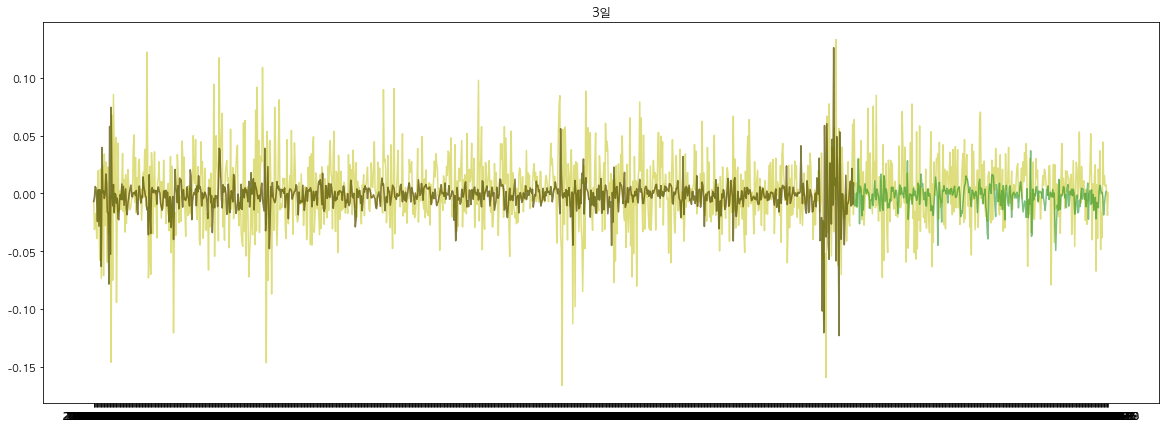

In [180]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
predicts = np.concatenate((train_predict,test_predict), axis=0)
plt.figure(figsize=(20,7))
plt.plot(d_change['y_탄소배출권_선물_내역종가'], color ='y', alpha =0.5)
plt.plot(train_predict, color ='red', alpha =0.5)
#plt.plot(test_predict, color ='red', alpha =0.5)
plt.plot(predicts, color ='green', alpha =0.5)
#plt.grid()
plt.title('3일')

# 윈도우 변경 50일

In [181]:
window_size = 50
x = []
y = []

for i in range(len(d_change) - window_size):
    x.append([d_change.iloc[i+j,:] for j in range(window_size)])
    y.append(d_change.iloc[window_size +i, -1])             

X = np.asarray(x)
Y = np.asarray(y)

train_test_split = 1000

X_train = X[:train_test_split,:]
Y_train = Y[:train_test_split]

X_test = X[train_test_split:,:]
Y_test = Y[train_test_split:]

X_train = np.reshape(X_train, (X_train.shape[0], window_size, 29))
X_test = np.reshape(X_test, (X_test.shape[0], window_size, 29))

In [182]:
model = Sequential()
model.add(LSTM(128, input_shape = (50, 29,)))
model.add(Dense(100, activation='linear'))
model.add(Dense(100, activation='LeakyReLU'))
model.add(Dense(1))
model.summary()

Model: "sequential_273"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_524 (LSTM)              (None, 128)               80896     
_________________________________________________________________
dense_771 (Dense)            (None, 100)               12900     
_________________________________________________________________
dense_772 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_773 (Dense)            (None, 1)                 101       
Total params: 103,997
Trainable params: 103,997
Non-trainable params: 0
_________________________________________________________________


In [183]:
model.compile(loss='mse', optimizer ='adam', metrics = ['accuracy'])
history = model.fit(X_train, Y_train, epochs=50, batch_size=32, validation_data =(X_test, Y_test))

Epoch 1/50
32/32 [==============================] - 5s 73ms/step - loss: 0.0010 - accuracy: 0.0130 - val_loss: 6.6815e-04 - val_accuracy: 0.0035
Epoch 2/50
32/32 [==============================] - 2s 63ms/step - loss: 0.0010 - accuracy: 0.0130 - val_loss: 7.0879e-04 - val_accuracy: 0.0035
Epoch 3/50
32/32 [==============================] - 2s 55ms/step - loss: 9.9086e-04 - accuracy: 0.0130 - val_loss: 6.6030e-04 - val_accuracy: 0.0035
Epoch 4/50
32/32 [==============================] - 2s 56ms/step - loss: 9.8252e-04 - accuracy: 0.0130 - val_loss: 6.6017e-04 - val_accuracy: 0.0035
Epoch 5/50
32/32 [==============================] - 2s 52ms/step - loss: 9.8688e-04 - accuracy: 0.0130 - val_loss: 6.8950e-04 - val_accuracy: 0.0035
Epoch 6/50
32/32 [==============================] - 2s 49ms/step - loss: 9.8007e-04 - accuracy: 0.0130 - val_loss: 6.8088e-04 - val_accuracy: 0.0035
Epoch 7/50
32/32 [==============================] - 2s 51ms/step - loss: 9.7171e-04 - accuracy: 0.0130 - val_loss:

Text(0.5, 1.0, '50일')

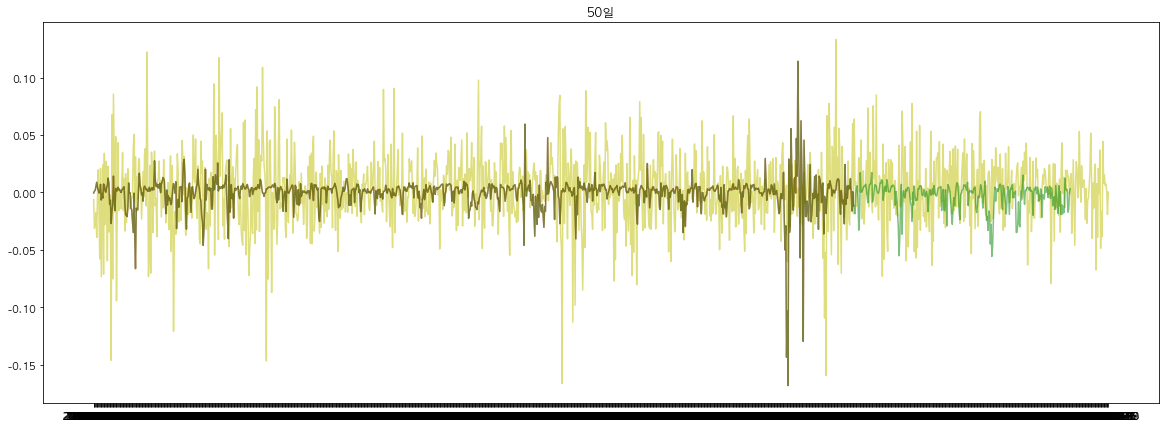

In [184]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
predicts = np.concatenate((train_predict,test_predict), axis=0)
plt.figure(figsize=(20,7))
plt.plot(d_change['y_탄소배출권_선물_내역종가'], color ='y', alpha =0.5)
plt.plot(train_predict, color ='red', alpha =0.5)
#plt.plot(test_predict, color ='red', alpha =0.5)
plt.plot(predicts, color ='green', alpha =0.5)
#plt.grid()
plt.title('50일')

## 100일

In [185]:
window_size = 100
x = []
y = []

for i in range(len(d_change) - window_size):
    x.append([d_change.iloc[i+j,:] for j in range(window_size)])
    y.append(d_change.iloc[window_size +i, -1])             

X = np.asarray(x)
Y = np.asarray(y)

train_test_split = 1000

X_train = X[:train_test_split,:]
Y_train = Y[:train_test_split]

X_test = X[train_test_split:,:]
Y_test = Y[train_test_split:]

X_train = np.reshape(X_train, (X_train.shape[0], window_size, 29))
X_test = np.reshape(X_test, (X_test.shape[0], window_size, 29))

In [190]:
model = Sequential()
model.add(LSTM(128, input_shape = (100, 29,)))
model.add(Dense(100, activation='linear'))
model.add(Dense(100, activation='LeakyReLU'))
model.add(Dense(1))
model.summary()

Model: "sequential_278"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_529 (LSTM)              (None, 128)               80896     
_________________________________________________________________
dense_786 (Dense)            (None, 100)               12900     
_________________________________________________________________
dense_787 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_788 (Dense)            (None, 1)                 101       
Total params: 103,997
Trainable params: 103,997
Non-trainable params: 0
_________________________________________________________________


In [191]:
model.compile(loss='mse', optimizer ='adam', metrics = ['accuracy'])
history = model.fit(X_train, Y_train, epochs=50, batch_size=32, validation_data =(X_test, Y_test))

Epoch 1/50
32/32 [==============================] - 5s 112ms/step - loss: 0.0011 - accuracy: 0.0120 - val_loss: 6.2364e-04 - val_accuracy: 0.0043
Epoch 2/50
32/32 [==============================] - 3s 97ms/step - loss: 9.9141e-04 - accuracy: 0.0120 - val_loss: 5.8096e-04 - val_accuracy: 0.0043
Epoch 3/50
32/32 [==============================] - 3s 95ms/step - loss: 9.7603e-04 - accuracy: 0.0120 - val_loss: 5.7482e-04 - val_accuracy: 0.0043
Epoch 4/50
32/32 [==============================] - 3s 89ms/step - loss: 9.9587e-04 - accuracy: 0.0120 - val_loss: 5.7266e-04 - val_accuracy: 0.0043
Epoch 5/50
32/32 [==============================] - 3s 95ms/step - loss: 9.8081e-04 - accuracy: 0.0120 - val_loss: 6.1699e-04 - val_accuracy: 0.0043
Epoch 6/50
32/32 [==============================] - 3s 94ms/step - loss: 9.8558e-04 - accuracy: 0.0120 - val_loss: 6.2250e-04 - val_accuracy: 0.0043
Epoch 7/50
32/32 [==============================] - 3s 96ms/step - loss: 9.9134e-04 - accuracy: 0.0120 - val_

Text(0.5, 1.0, '100일')

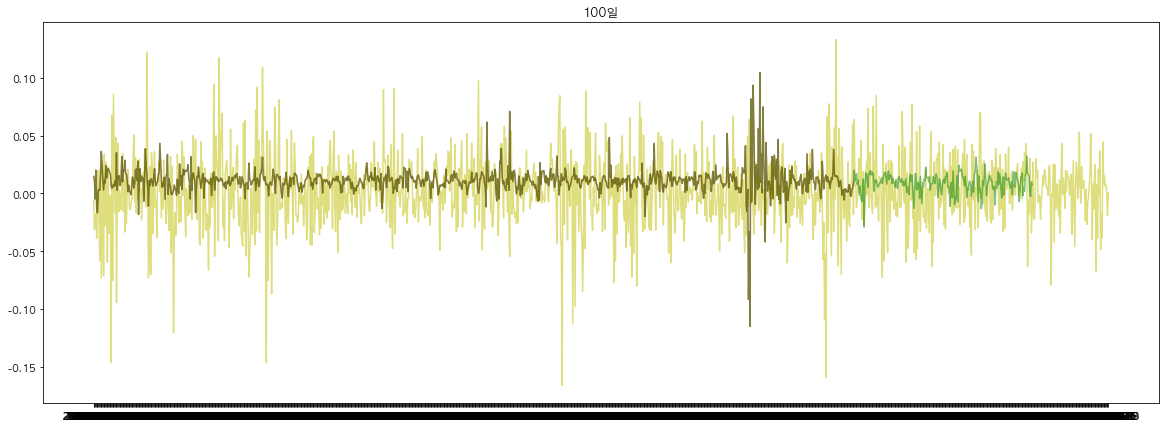

In [192]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
predicts = np.concatenate((train_predict,test_predict), axis=0)
plt.figure(figsize=(20,7))
plt.plot(d_change['y_탄소배출권_선물_내역종가'], color ='y', alpha =0.5)
plt.plot(train_predict, color ='red', alpha =0.5)
#plt.plot(test_predict, color ='red', alpha =0.5)
plt.plot(predicts, color ='green', alpha =0.5)
plt.title('100일')
#plt.grid()

# LSTM 다른 피처 없이 가격으로만 10일

In [193]:
window_size = 10
x = []
y = []

for i in range(len(d_change) - window_size):
    x.append([d_change.iloc[i+j,-1] for j in range(window_size)])
    y.append(d_change.iloc[window_size +i, -1])             

print(x[0])

[-0.006218905472636704, -0.03128911138923651, -0.025839793281653756, -0.017241379310344862, -0.03913630229419707, -0.002808988764045006, 0.019718309859154903, -0.02209944751381221, -0.057909604519774005, 0.020989505247376306]


In [194]:
X = np.asarray(x)
Y = np.asarray(y)
print(X)
print(Y)

train_test_split = 1000

X_train = X[:train_test_split,:]
Y_train = Y[:train_test_split]

X_test = X[train_test_split:,:]
Y_test = Y[train_test_split:]

[[-0.00621891 -0.03128911 -0.02583979 ... -0.02209945 -0.0579096
   0.02098951]
 [-0.03128911 -0.02583979 -0.01724138 ... -0.0579096   0.02098951
  -0.07342144]
 [-0.02583979 -0.01724138 -0.0391363  ...  0.02098951 -0.07342144
  -0.022187  ]
 ...
 [-0.00101266  0.03683055 -0.04872087 ...  0.01514109  0.00610169
   0.00724394]
 [ 0.03683055 -0.04872087 -0.01661528 ...  0.00610169  0.00724394
   0.00117076]
 [-0.04872087 -0.01661528 -0.03832085 ...  0.00724394  0.00117076
  -0.01921149]]
[-0.07342144 -0.022187    0.02431118 ...  0.00117076 -0.01921149
  0.00034066]


In [195]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(1000, 10) (1000,) (325, 10) (325,)


In [196]:
X_train = np.reshape(X_train, (X_train.shape[0], window_size, 1))
X_test = np.reshape(X_test, (X_test.shape[0], window_size, 1))

In [197]:
model = Sequential()
model.add(LSTM(128, input_shape = (10, 1,)))
model.add(Dense(1))
model.summary()

Model: "sequential_279"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_530 (LSTM)              (None, 128)               66560     
_________________________________________________________________
dense_789 (Dense)            (None, 1)                 129       
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [198]:
model.compile(loss='mse', optimizer ='adam', metrics = ['accuracy'])
history = model.fit(X_train, Y_train, epochs=50, batch_size=32, validation_data =(X_test, Y_test))

Epoch 1/50
32/32 [==============================] - 2s 24ms/step - loss: 0.0011 - accuracy: 0.0140 - val_loss: 7.2945e-04 - val_accuracy: 0.0031
Epoch 2/50
32/32 [==============================] - 0s 12ms/step - loss: 0.0010 - accuracy: 0.0140 - val_loss: 7.5508e-04 - val_accuracy: 0.0031
Epoch 3/50
32/32 [==============================] - 0s 14ms/step - loss: 0.0010 - accuracy: 0.0140 - val_loss: 7.2925e-04 - val_accuracy: 0.0031
Epoch 4/50
32/32 [==============================] - 0s 14ms/step - loss: 0.0010 - accuracy: 0.0140 - val_loss: 7.1700e-04 - val_accuracy: 0.0031
Epoch 5/50
32/32 [==============================] - 0s 13ms/step - loss: 0.0010 - accuracy: 0.0140 - val_loss: 7.0563e-04 - val_accuracy: 0.0031
Epoch 6/50
32/32 [==============================] - 0s 14ms/step - loss: 0.0010 - accuracy: 0.0140 - val_loss: 6.9742e-04 - val_accuracy: 0.0031
Epoch 7/50
32/32 [==============================] - 0s 13ms/step - loss: 0.0010 - accuracy: 0.0140 - val_loss: 7.0745e-04 - val_ac

In [200]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
predicts = np.concatenate((train_predict,test_predict), axis=0)

Text(0.5, 1.0, '10일, x=배출권가격')

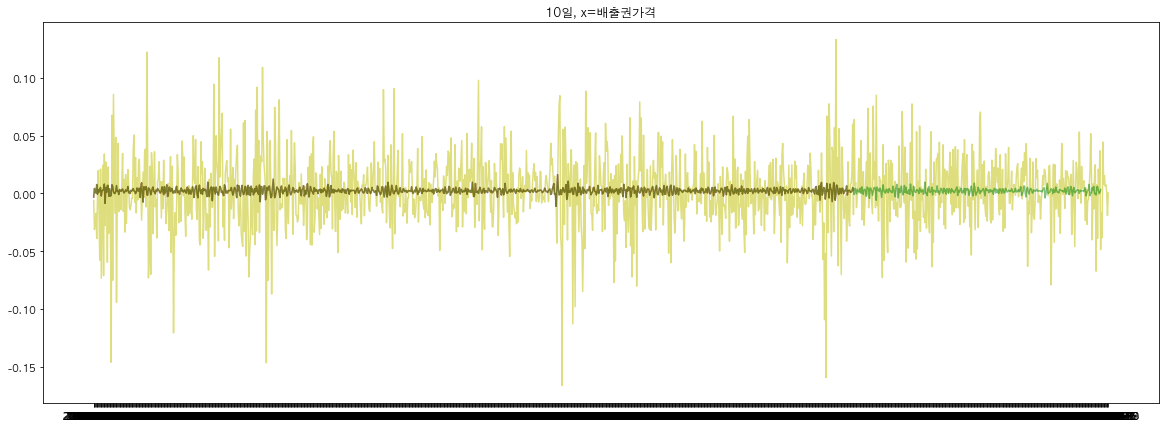

In [201]:
plt.figure(figsize=(20,7))
plt.plot(d_change['y_탄소배출권_선물_내역종가'], color ='y', alpha =0.5)
plt.plot(train_predict, color ='red', alpha =0.5)
#plt.plot(test_predict, color ='red', alpha =0.5)
plt.plot(predicts, color ='green', alpha =0.5)
#plt.grid()
plt.title('10일, x=배출권가격')

# machine learning, 랜덤포레스트, 배출권가격만 , 10일

In [202]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

In [203]:
X_train =X_train.reshape(-1,10)

In [204]:
X_test = X_test.reshape(-1,10)

In [205]:
Y_train.shape

(1000,)

In [206]:
rfr = RandomForestRegressor()
rfr.fit(X_train, Y_train)
rfr_preds = rfr.predict(X_test)
rfr_preds_train = rfr.predict(X_train)
print('RandomForestRegressor')
print('rmse :', np.sqrt(mean_squared_error(Y_test, rfr_preds)))
print('r_score :', r2_score(Y_test, rfr_preds))
print()

RandomForestRegressor
rmse : 0.027325930577037333
r_score : -0.06648908300426415



In [207]:
predicts = np.concatenate((rfr_preds_train,rfr_preds), axis=0)

Text(0.5, 1.0, '랜덤포레스트, 10일, x=배출권가격')

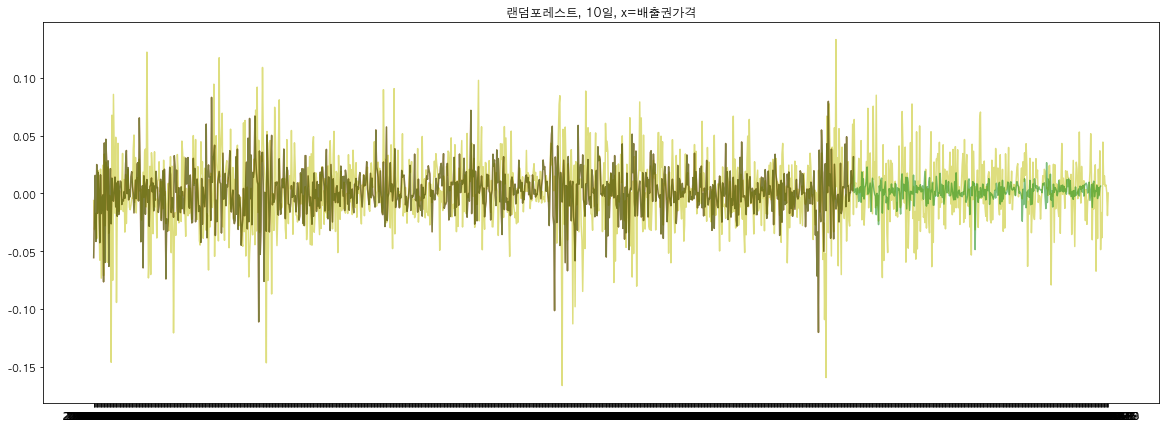

In [208]:
plt.figure(figsize=(20,7))
plt.plot(d_change['y_탄소배출권_선물_내역종가'], color ='y', alpha =0.5)
plt.plot(rfr_preds_train, color ='red', alpha =0.5)
#plt.plot(test_predict, color ='red', alpha =0.5)
plt.plot(predicts, color ='green', alpha =0.5)
#plt.grid()
plt.title('랜덤포레스트, 10일, x=배출권가격')

# machine learning, 랜덤포레스트, 다 넣어서, 10일

In [209]:
window_size = 10
x = []
y = []

for i in range(len(d_change) - window_size):
    x.append([d_change.iloc[i+j,:] for j in range(window_size)])
    y.append(d_change.iloc[window_size +i, -1])             


In [210]:
X = np.asarray(x)
Y = np.asarray(y)
print(X)
print(Y)

train_test_split = 1000

X_train = X[:train_test_split,:]
Y_train = Y[:train_test_split]

X_test = X[train_test_split:,:]
Y_test = Y[train_test_split:]

[[[ 2.36082135e-03 -7.32938813e-03  3.86440963e-04 ...  5.66798881e-04
    4.18673138e-03 -6.21890547e-03]
  [ 2.90299611e-03  1.12510548e-02  8.15411359e-03 ... -1.46952035e-02
   -1.21742852e-02 -3.12891114e-02]
  [-8.19224468e-03  1.16049077e-02 -2.69050078e-03 ... -2.32105857e-02
   -1.74050431e-02 -2.58397933e-02]
  ...
  [-4.34640878e-03 -3.12219876e-03 -2.06570598e-03 ...  1.40941255e-02
   -1.59517348e-02 -2.20994475e-02]
  [ 6.71177562e-03  1.06151935e-02  5.85390895e-03 ... -2.38701268e-02
   -2.36507937e-02 -5.79096045e-02]
  [-5.09512711e-03 -6.79384708e-03 -6.02563364e-03 ...  1.74755193e-03
    9.48693979e-03  2.09895052e-02]]

 [[ 2.90299611e-03  1.12510548e-02  8.15411359e-03 ... -1.46952035e-02
   -1.21742852e-02 -3.12891114e-02]
  [-8.19224468e-03  1.16049077e-02 -2.69050078e-03 ... -2.32105857e-02
   -1.74050431e-02 -2.58397933e-02]
  [ 8.37004405e-03  8.51600092e-03  8.89508807e-03 ... -1.01519308e-02
   -1.66013979e-02 -1.72413793e-02]
  ...
  [ 6.71177562e-03  1.0

In [211]:
X_train = np.reshape(X_train, (X_train.shape[0], window_size, 29))
X_test = np.reshape(X_test, (X_test.shape[0], window_size, 29))

In [212]:
X_test.shape

(325, 10, 29)

In [213]:
X_train = X_train.reshape(1000,-1)
X_test = X_test.reshape(325,-1)

In [214]:
rfr = RandomForestRegressor()
rfr.fit(X_train, Y_train)
rfr_preds = rfr.predict(X_test)
rfr_preds_train = rfr.predict(X_train)
print('RandomForestRegressor')
print('rmse :', np.sqrt(mean_squared_error(Y_test, rfr_preds)))
print('r_score :', r2_score(Y_test, rfr_preds))
print()

RandomForestRegressor
rmse : 0.027237986449469904
r_score : -0.05963548105107819



In [215]:
r2_score(Y_train, rfr_preds_train)

0.854584615336429

In [216]:
predicts = np.concatenate((rfr_preds_train,rfr_preds), axis=0)

Text(0.5, 1.0, '랜덤포레스트, 10일')

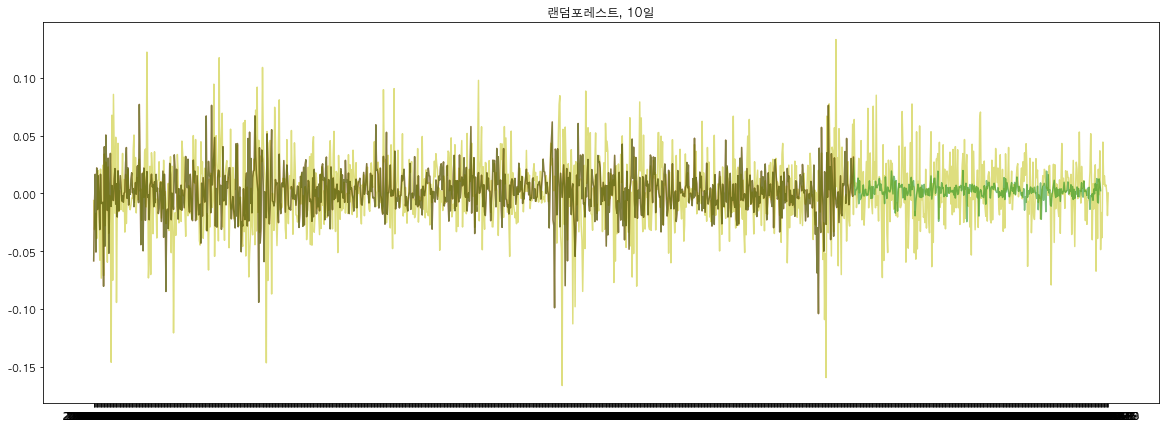

In [217]:
plt.figure(figsize=(20,7))
plt.plot(d_change['y_탄소배출권_선물_내역종가'], color ='y', alpha =0.5)
plt.plot(rfr_preds_train, color ='red', alpha =0.5)
#plt.plot(test_predict, color ='red', alpha =0.5)
plt.plot(predicts, color ='green', alpha =0.5)
#plt.grid()
plt.title('랜덤포레스트, 10일')

# ################### 여기까지 (아래는 에러로 끝남)

# 머신러닝 그리드 서치 50분 이상 안되서 중지

In [69]:
from sklearn.model_selection import GridSearchCV

In [70]:
estimator = RandomForestRegressor()
param_grid = {
    'n_estimators': [100, 150, 200, 250,300,350,400],
    'max_depth': [None, 6, 9, 12],
    'min_samples_split': [0.01, 0.05, 0.1],
}

In [71]:
from sklearn.model_selection import KFold

In [72]:
# 평가지표 지정
kf = KFold(random_state=30,
           n_splits=10,
           shuffle=True,
          )

In [73]:
# define grid_search
grid_search = GridSearchCV(estimator=estimator, 
                           param_grid=param_grid, 
                           cv=kf, 
                           n_jobs=-1, 
                           verbose=2
                          )

# fit with (x_train, y_train)
grid_search.fit(X_train, Y_train)

Fitting 10 folds for each of 84 candidates, totalling 840 fits


KeyboardInterrupt: 

In [ ]:
print('best_params',grid_search.best_params_)
print('best_score',grid_search.best_score_)

In [ ]:
rfr_preds = rfr.predict(X_test)
rfr_preds_train = rfr.predict(X_train)
predicts = np.concatenate((rfr_preds_train,rfr_preds), axis=0)

# 기본 lSTM + 그리드 서치 에러중

In [74]:
window_size = 10
x = []
y = []

for i in range(len(d_change) - window_size):
    x.append([d_change.iloc[i+j,:] for j in range(window_size)])
    y.append(d_change.iloc[window_size +i, -1])             


In [75]:
X = np.asarray(x)
Y = np.asarray(y)

train_test_split = 1000

X_train = X[:train_test_split,:]
Y_train = Y[:train_test_split]

X_test = X[train_test_split:,:]
Y_test = Y[train_test_split:]

In [76]:
X_train = np.reshape(X_train, (X_train.shape[0], window_size, 29))
X_test = np.reshape(X_test, (X_test.shape[0], window_size, 29))

In [90]:
X_train.shape

(1000, 10, 29)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.callbacks import *
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential

In [91]:
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(LSTM(128, input_shape = (10, 29,)))
    classifier.add(Dense(units = 6, activation = 'relu'))
    classifier.add(Dense(units = 6, activation = 'relu'))
    classifier.add(Dense(units = 1, activation = 'relu'))
    classifier.add(LSTM(128))
    classifier.add(Dense(1))
    classifier.compile(optimizer = optimizer, loss = 'mse', metrics = ['accuracy'])
    return classifier

In [92]:
from keras.wrappers.scikit_learn import KerasClassifier

In [93]:
classifier = KerasClassifier(build_fn = build_classifier)

In [94]:
parameters = {'batch_size': [25, 32],
              'epochs': [80, 100],
              'optimizer': ['adam', 'rmsprop']}

In [95]:
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10)

In [96]:
import warnings
warnings.filterwarnings(action='ignore')

In [97]:
grid_search = grid_search.fit(X_train, Y_train)

ValueError: Input 0 of layer lstm_487 is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 1)

In [ ]:
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

# try

In [116]:
X_train.shape

(1000, 10, 29)

In [118]:
model = Sequential()
model.add(LSTM(128, input_shape = (10, 29,)))
model.add(LSTM(8))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(56, activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse', metrics = ['accuracy'])

ValueError: Input 0 of layer lstm_505 is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 128)

In [ ]:
history = model.fit(X_train, Y_train, epochs=50, batch_size=32, validation_data =(X_test, Y_test))